## 1. Bussiness Understanding

## Data Analysis Project -- Indian Start-up Funding Analysis

Ideas, creativity, and execution are essential for a start-up to flourish. But are they enough? Investors provide start-ups and other entrepreneurial ventures with the capital---popularly known as "funding"---to think big, grow rich, and leave a lasting impact. In this project, you are going to analyse funding received by start-ups in India from 2018 to 2021. You will find the data for each year of funding in a separate csv file in the dataset provided. In these files you'll find the start-ups' details, the funding amounts received, and the investors' information.

## 2. import Packages

In [5]:
import pyodbc 
from dotenv import dotenv_values 
import re
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

## 3. data loading

In [7]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection"

In [8]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

## Dataset of startup_funding 2020

In [9]:
#load dataset
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2020"
 
# Read data from the SQL query result
data_2020 = pd.read_sql(query, connection)

 # Display the first few rows of the DataFrame
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [10]:
# check dataset info
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


## 4. Data Cleaning

In [11]:
# Rename columns in data_2020 DataFrame
data_2020.rename(columns={'Company_Brand': 'Company Brand', 'What_it_does': 'What it does'}, inplace=True)

In [12]:
# Identify Duplicates
data_2020.duplicated().sum()

3

In [13]:
# Remove Duplicates
data_2020.drop_duplicates(inplace= True)

In [14]:
# check for missing values
data_2020.isnull().sum()

Company Brand       0
Founded           213
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [15]:
# This approach helps maintain the overall distribution of the data.
median_founded_year = data_2020['Founded'].median()
data_2020['Founded'].fillna(median_founded_year, inplace=True)

In [16]:
# change Data Type for Founded to INT
data_2020['Founded'] = data_2020['Founded'].astype(int)

In [17]:
# check for missing values
data_2020.isnull().sum()

Company Brand       0
Founded             0
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [18]:
data_2020[['HeadQuarter','f','u']] = data_2020['HeadQuarter'].str.split(', ',expand=True)
data_2020.drop(columns=['f','u'], axis=1, inplace = True)

In [19]:
# fill all missing values with unknown
data_2020['HeadQuarter'].fillna('Unknown', inplace=True)

In [20]:
print(data_2020['HeadQuarter'].unique())

['Chennai' 'Bangalore' 'Pune' 'New Delhi' 'Indore' 'Hyderabad' 'Gurgaon'
 'Belgaum' 'Noida' 'Mumbai' 'Andheri' 'Jaipur' 'Ahmedabad' 'Kolkata'
 'Tirunelveli' 'Thane' 'Unknown' 'Singapore' 'Gurugram' 'Gujarat'
 'Haryana' 'Kerala' 'Jodhpur' 'Delhi' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'San Francisco Bay Area' 'Bangaldesh' 'London' 'Milano' 'Palmwoods'
 'France' 'Trivandrum' 'Cochin' 'Samastipur' 'Irvine' 'Tumkur'
 'Newcastle Upon Tyne' 'Shanghai' 'Jiaxing' 'Rajastan' 'Kochi' 'Ludhiana'
 'Dehradun' 'San Franciscao' 'Tangerang' 'Berlin' 'Seattle' 'Riyadh'
 'Seoul' 'Bangkok' 'Kanpur' 'Chandigarh' 'Warangal' 'Hyderebad' 'Odisha'
 'Bihar' 'Goa' 'Tamil Nadu' 'Uttar Pradesh' 'Bhopal' 'Banglore'
 'Coimbatore' 'Bengaluru']


In [21]:
# Identify rows with missing HeadQuarter values
data_2020['HeadQuarter'].isnull().sum()

0

In [22]:
# Identify rows with missing Sector values
data_2020['Sector'].isnull().sum()

13

In [23]:
# fill all missing values with unknown
data_2020['Sector'].fillna('Unknown', inplace=True)

In [24]:
# Identify rows with missing Sector values
data_2020['Sector'].isnull().sum()

0

In [25]:
print(data_2020['Sector'].unique())

['AgriTech' 'EdTech' 'Hygiene management' 'Escrow' 'Networking platform'
 'FinTech' 'Crowdsourcing' 'Food & Bevarages' 'HealthTech'
 'Fashion startup' 'Food Industry' 'Food Delivery'
 'Virtual auditing startup' 'E-commerce' 'Gaming' 'Work fulfillment'
 'AI startup' 'Telecommunication' 'Logistics' 'Tech Startup' 'Sports'
 'Retail' 'Medtech' 'Tyre management' 'Cloud company' 'Software company'
 'Venture capitalist' 'Renewable player' 'IoT startup' 'SaaS startup'
 'Aero company' 'Marketing company' 'Retail startup' 'Co-working Startup'
 'Finance company' 'Tech company' 'Solar Monitoring Company'
 'Video sharing platform' 'Gaming startup' 'Video streaming platform'
 'Consumer appliances' 'Blockchain startup' 'Conversational AI platform'
 'Real Estate' 'SaaS platform' 'AI platform' 'Fusion beverages' 'HR Tech'
 'Job portal' 'Hospitality' 'Digital Media' 'Dairy startup'
 'Content management' 'Spacetech' 'Transportation' 'Trading platform'
 'AI Company' 'Photonics startup' 'Entertainment' 'Co

In [26]:
# Identify rows with missing What_it_does values
data_2020['What it does'].isnull().sum()

0

In [27]:
# Identify rows with missing Founders values
data_2020['Founders'].isnull().sum() 

12

In [28]:
# fill Founders Colmun Unknown
data_2020['Founders'].fillna('Unknown',inplace=True)


In [29]:
# Identify rows with missing Founders values
data_2020['Founders'].isnull().sum() 

0

In [30]:
# Identify rows with missing Investor values
data_2020['Investor'].isnull().sum() 


38

In [31]:
# fill Investor Colmun Unknown
data_2020['Investor'].fillna('Unknown', inplace=True)

In [32]:
# Identify rows with missing Investor values
data_2020['Investor'].isnull().sum() 

0

In [33]:
data_2020.head()

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [34]:
# removing unused column10
data_2020 = data_2020.drop(columns=["column10"])


In [35]:
# Identify rows with missing Amount values
data_2020['Amount'].isnull().sum() 

253

In [36]:
# fill all missing values with unknown
data_2020 = data_2020.fillna('Unknown')

In [37]:
# Identify rows with missing Amount values
data_2020['Amount'].isnull().sum() 

0

In [38]:
print(data_2020['Amount'].unique())

[200000.0 100000.0 'Unknown' 400000.0 340000.0 600000.0 45000000.0
 1000000.0 2000000.0 1200000.0 660000000.0 120000.0 7500000.0 5000000.0
 500000.0 3000000.0 10000000.0 145000000.0 100000000.0 21000000.0
 4000000.0 20000000.0 560000.0 275000.0 4500000.0 15000000.0 390000000.0
 7000000.0 5100000.0 700000000.0 2300000.0 700000.0 19000000.0 9000000.0
 40000000.0 750000.0 1500000.0 7800000.0 50000000.0 80000000.0 30000000.0
 1700000.0 2500000.0 40000.0 33000000.0 35000000.0 300000.0 25000000.0
 3500000.0 200000000.0 6000000.0 1300000.0 4100000.0 575000.0 800000.0
 28000000.0 18000000.0 3200000.0 900000.0 250000.0 4700000.0 75000000.0
 8000000.0 121000000.0 55000000.0 3300000.0 11000000.0 16000000.0
 5400000.0 150000000.0 4200000.0 22000000.0 52000000.0 1100000.0
 118000000.0 1600000.0 18500000.0 70000000000.0 800000000.0 400000000.0
 150000.0 176000000.0 60000000.0 470000.0 240000.0 3000000000.0 74000000.0
 62000000.0 2100000.0 500000000.0 12500000.0 2200000000.0 5060000.0
 225000000.0 24

In [39]:
# Drop Unknown in HeadQuarter and Stage
value_to_drop = 'Unknown'
data_2020 = data_2020[data_2020['HeadQuarter'] != value_to_drop]

value_to_drop = 'Unknown'
data_2020 = data_2020[data_2020['Stage'] != value_to_drop]

# Drop Unknown in Amount($) and Sector
value_to_drop = 'Unknown'
data_2020 = data_2020[data_2020['Sector'] != value_to_drop]

value_to_drop = 'Unknown'
data_2020 = data_2020[data_2020['Amount'] != value_to_drop]

In [40]:
# Identify rows with missing Amount values
data_2020['Stage'].isnull().sum() 

0

In [41]:
# fill all missing values with unknown
data_2020['Stage'].fillna('Unknown', inplace=True)

In [42]:
print(data_2020['Stage'].unique())

['Pre-seed' 'Seed' 'Pre-series A' 'Series C' 'Series A' 'Series B' 'Debt'
 'Pre-series C' 'Series E' 'Series D' 'Bridge' 'Series B2' 'Pre-series B'
 'Series F' 'Pre- series A' 'Edge' 'Series H' 'Pre-Series B' 'Seed A'
 'Series A-1' 'Seed round' 'Seed Round & Series A' 'Pre Series A'
 'Pre series A1' 'Series E2' 'Pre series A' 'Seed Round' 'Pre series B'
 'Pre series C' 'Angel Round' 'Series D1' 'Mid series' 'Seed funding'
 'Seed Funding']


In [43]:
replacement3 = { 
    'Bridge':'Bridge Round',
    'Edge': 'Series B',
    'Mid series':'Series B',
    'Pre seed Round':'Pre-series A',
    'Pre Series A':'Pre-series A',
    'Pre- series A':'Pre-series A',
    'Pre series A1':'Pre-series A',
    'Pre series B':'Pre-series A',
    'Pre series C':'Pre-series A',
    'Pre-seed':'Pre-series A',
    'Pre-seed Round':'Pre-series A',
    'Pre-series':'Pre-series A',
    'Pre-series B':'Pre-series A',
    'Pre-series C':'Pre-series A',
    'Seed':'Pre-series A',
    'Seed A':'Series A',
    'Seed Funding':'Pre-series A',
    'Seed Investment':'Pre-series A',
    'Seed round':'Pre-series A',
    'Seed Round & Series A':'Series A',
    'Series A-1':'Series A',
    'Series B':'Series B',
    'Series B2':'Series B',
    'Series C, D':'Series C',
    'Series D1':'Series D',
    'Series E2':'Series E',
    'Seed funding':'Pre-series A',
    'Pre seed round':'Pre-series A',
    'Seed Round':'Pre-series A',
    'Pre series A':'Pre-series A',
    'Pre-Seed':'Pre-series A',
    'Pre-Series B':'Pre-series A',
}

data_2020['Stage'] = data_2020['Stage'].replace(replacement3)

In [44]:
# Identify rows with missing Amount values
data_2020['Stage'].isnull().sum() 

0

In [45]:
# Change dtype to float
data_2020['Amount'] = data_2020['Amount'].astype(float) 

In [46]:
data_2020['Year'] = 2020

In [47]:
data_2020

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-series A,2020
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Pre-series A,2020
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,2020
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,2020
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,2020
...,...,...,...,...,...,...,...,...,...,...
1042,Super Surfaces,2016,Hyderabad,Deisgning,A design solution based company,Kumar Varma,Vishnu Reddy,500000.0,Series A,2020
1048,GoMechanic,2016,Delhi,Automobile Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...","Chiratae Ventures, Sequoia Capital, Orios Vent...",14700000.0,Series B,2020
1049,Fashor,2017,Chennai,Fashion,Women’s fashion and apparel,"Vikram Kankaria, Priyanka Kankaria",Sprout venture partners,1000000.0,Pre-series A,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


## Dataset of startup_funding 2021

In [48]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2021"
 
# Read data from the SQL query result
data_2021 = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [49]:
# Get summary information about the DataFrame
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


## Data Cleaning

In [50]:
# Rename columns in data_2021 DataFrame
data_2021.rename(columns={'Company_Brand': 'Company Brand', 'What_it_does': 'What it does'}, inplace=True)

In [51]:
data_2021.duplicated().sum()

19

In [52]:
data_2021.drop_duplicates(inplace=True)

In [53]:
# check for missing values
data_2021.isnull().sum()

Company Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          61
Amount             3
Stage            421
dtype: int64

In [54]:
# This approach helps maintain the overall distribution of the data.
median_founded_year = data_2021['Founded'].median()
data_2021['Founded'].fillna(median_founded_year, inplace=True)

In [55]:
# change Data Type for Founded to INT
data_2021['Founded'] = data_2021['Founded'].astype(int)

In [56]:
# check for missing values
data_2021.isnull().sum()

Company Brand      0
Founded            0
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          61
Amount             3
Stage            421
dtype: int64

In [57]:
# fill them with the mode (most frequent value) of the 'HeadQuarter' column.
mode_headquarter = data_2021['HeadQuarter'].mode()[0]
data_2021['HeadQuarter'].fillna(mode_headquarter, inplace=True)

In [58]:
print(data_2021['HeadQuarter'].unique())

['Bangalore' 'Mumbai' 'Gurugram' 'New Delhi' 'Hyderabad' 'Jaipur'
 'Ahmadabad' 'Chennai' 'Small Towns, Andhra Pradesh' 'Goa' 'Rajsamand'
 'Ranchi' 'Faridabad, Haryana' 'Gujarat' 'Pune' 'Thane' 'Computer Games'
 'Cochin' 'Noida' 'Chandigarh' 'Gurgaon' 'Vadodara' 'Food & Beverages'
 'Pharmaceuticals\t#REF!' 'Gurugram\t#REF!' 'Kolkata' 'Ahmedabad' 'Mohali'
 'Haryana' 'Indore' 'Powai' 'Ghaziabad' 'Nagpur' 'West Bengal' 'Patna'
 'Samsitpur' 'Lucknow' 'Telangana' 'Silvassa' 'Thiruvananthapuram'
 'Faridabad' 'Roorkee' 'Ambernath' 'Panchkula' 'Surat' 'Coimbatore'
 'Andheri' 'Mangalore' 'Telugana' 'Bhubaneswar' 'Kottayam' 'Beijing'
 'Panaji' 'Satara' 'Orissia' 'Jodhpur' 'New York' 'Santra'
 'Mountain View, CA' 'Trivandrum' 'Jharkhand' 'Kanpur' 'Bhilwara'
 'Guwahati' 'Online Media\t#REF!' 'Kochi' 'London'
 'Information Technology & Services' 'The Nilgiris' 'Gandhinagar']


In [59]:
print(data_2021['Sector'].unique())

['AI startup' 'EdTech' 'B2B E-commerce' 'FinTech' 'Home services'
 'HealthTech' 'Tech Startup' 'E-commerce' 'B2B service' 'Helathcare'
 'Renewable Energy' 'Electronics' 'IT startup' 'Food & Beverages'
 'Aeorspace' 'Deep Tech' 'Dating' 'Gaming' 'Robotics' 'Retail' 'Food'
 'Oil and Energy' 'AgriTech' 'Telecommuncation' 'Milk startup'
 'AI Chatbot' 'IT' 'Logistics' 'Hospitality' 'Fashion' 'Marketing'
 'Transportation' 'LegalTech' 'Food delivery' 'Automotive' 'SaaS startup'
 'Fantasy sports' 'Video communication' 'Social Media' 'Skill development'
 'Rental' 'Recruitment' 'HealthCare' 'Sports' 'Computer Games'
 'Consumer Goods' 'Information Technology' 'Apparel & Fashion'
 'Logistics & Supply Chain' 'Healthtech' 'Healthcare' 'SportsTech'
 'HRTech' 'Wine & Spirits' 'Mechanical & Industrial Engineering'
 'Spiritual' 'Financial Services' 'Industrial Automation' 'Health'
 'Lifestyle' 'IoT' 'Banking' 'Computer software' 'Tech startup'
 'Digital mortgage' 'Information Technology & Services' 'Furn

In [60]:
# Clean data by standardizing text and removing extra spaces
data_2021['Sector'] = data_2021['Sector'].str.replace(r'[^a-zA-Z\s]', '').str.strip()

# Standardize specific variations
data_2021['Sector'] = data_2021['Sector'].replace({
    'Healtcare': 'Healthcare',
    'HRTech': 'HR Tech',
    'Healthtech': 'Healthcare',
    'Information Technology': 'IT',
})

# Display unique sectors after cleaning
unique_sectors = data_2021['Sector'].unique()
print(unique_sectors)

['AI startup' 'EdTech' 'B2B E-commerce' 'FinTech' 'Home services'
 'HealthTech' 'Tech Startup' 'E-commerce' 'B2B service' 'Helathcare'
 'Renewable Energy' 'Electronics' 'IT startup' 'Food & Beverages'
 'Aeorspace' 'Deep Tech' 'Dating' 'Gaming' 'Robotics' 'Retail' 'Food'
 'Oil and Energy' 'AgriTech' 'Telecommuncation' 'Milk startup'
 'AI Chatbot' 'IT' 'Logistics' 'Hospitality' 'Fashion' 'Marketing'
 'Transportation' 'LegalTech' 'Food delivery' 'Automotive' 'SaaS startup'
 'Fantasy sports' 'Video communication' 'Social Media' 'Skill development'
 'Rental' 'Recruitment' 'HealthCare' 'Sports' 'Computer Games'
 'Consumer Goods' 'Apparel & Fashion' 'Logistics & Supply Chain'
 'Healthcare' 'SportsTech' 'HR Tech' 'Wine & Spirits'
 'Mechanical & Industrial Engineering' 'Spiritual' 'Financial Services'
 'Industrial Automation' 'Health' 'Lifestyle' 'IoT' 'Banking'
 'Computer software' 'Tech startup' 'Digital mortgage'
 'Information Technology & Services' 'Furniture' 'B2B marketplace'
 'Location A

In [61]:
# Apply camel case conversion
data_2021['Sector'] = data_2021['Sector'].apply(lambda x: ''.join(word.capitalize() for word in x.split()))

In [62]:
# Identify rows with missing What_it_does values
data_2021['What it does'].isnull().sum()

0

In [63]:
# Identify rows with missing Founders values
data_2021['Founders'].isnull().sum() 

4

In [64]:
# fill Founders Colmun Unknown
data_2021['Founders'].fillna('Unknown',inplace=True)

In [65]:
# Identify rows with missing Investor values
data_2021['Investor'].isnull().sum() 

61

In [66]:
# fill Investor Colmun Unknown
data_2021['Investor'].fillna('Unknown', inplace=True)

In [67]:
# Identify rows with missing Amount values
data_2021['Amount'].isnull().sum() 

3

In [68]:
print(data_2021['Amount'].unique())

['$1,200,000' '$120,000,000' '$30,000,000' '$51,000,000' '$2,000,000'
 '$188,000,000' '$200,000' 'Undisclosed' '$1,000,000' '$3,000,000'
 '$100,000' '$700,000' '$9,000,000' '$40,000,000' '$49,000,000' '$400,000'
 '$300,000' '$25,000,000' '$160,000,000' '$150,000' '$1,800,000'
 '$5,000,000' '$850,000' '$53,000,000' '$500,000' '$1,100,000'
 '$6,000,000' '$800,000' '$10,000,000' '$21,000,000' '$7,500,000'
 '$26,000,000' '$7,400,000' '$1,500,000' '$600,000' '$800,000,000'
 '$17,000,000' '$3,500,000' '$15,000,000' '$215,000,000' '$2,500,000'
 '$350,000,000' '$5,500,000' '$83,000,000' '$110,000,000' '$500,000,000'
 '$65,000,000' '$150,000,000,000' '$300,000,000' '$2,200,000'
 '$35,000,000' '$140,000,000' '$4,000,000' '$13,000,000' None
 '$Undisclosed' '$2000000' '$800000' '$6000000' '$2500000' '$9500000'
 '$13000000' '$5000000' '$8000000' '$1000000' 'Upsparks' '$200000'
 '$12000000' '$1500000' '$1700000' '$5500000' '$400000' '$150000000'
 '$4000000' '$100000000' '$500000' '$15000000' '$10000

In [69]:
def clean_amounts(amount):
    if pd.isnull(amount) or (isinstance(amount, str) and amount.lower() in ['undisclosed', 'upspraks', 'ah! ventures', 'pre-series a', 'ito angel network, letsvanture', 'jito angel network, letsvanture']) or amount == '$':
        return np.nan
    else:
        amount = re.sub(r'[$,]', '', str(amount))
        amount = re.sub(r'[^0-9.]', '', amount)
        if amount == '':
            return np.nan
        else:
            return float(amount)

data_2021['Amount'] = data_2020['Amount'].apply(clean_amounts)

print(data_2021['Amount'])

0            NaN
1       100000.0
2            NaN
3            NaN
4            NaN
          ...   
1204         NaN
1205         NaN
1206         NaN
1207         NaN
1208         NaN
Name: Amount, Length: 1190, dtype: float64


In [70]:
# Impute with Central Tendency Measure: This approach assumes that the missing values are representative of the overall distribution of the 'Amount' column.
median_amount = data_2021['Amount'].median()
data_2021['Amount'].fillna(median_amount, inplace=True)


In [71]:
print(data_2021['Amount'].unique())

[3.1740e+06 1.0000e+05 6.0000e+05 4.5000e+07 1.0000e+06 2.0000e+06
 7.5000e+06 1.0000e+07 2.1000e+07 5.6000e+05 4.0000e+05 2.7500e+05
 2.0000e+07 1.5000e+07 5.1000e+06 5.0000e+05 2.3000e+06 7.0000e+05
 9.0000e+06 4.0000e+07 1.2000e+06 7.5000e+05 1.5000e+06 7.8000e+06
 4.0000e+06 8.0000e+07 4.0000e+04 3.5000e+07 3.0000e+06 3.0000e+05
 2.5000e+07 3.5000e+06 2.0000e+08 6.0000e+06 8.0000e+05 1.8000e+07
 1.0000e+08 5.0000e+06 9.0000e+05 2.5000e+05 3.2000e+06 7.5000e+07
 1.2100e+08 2.0000e+05 3.3000e+06 1.1000e+07 4.5000e+06 1.5000e+08
 2.5000e+06 7.0000e+06 4.2000e+06 1.7000e+06 1.6000e+06 1.8500e+07
 5.5000e+07 1.2000e+07 1.3400e+07 1.3000e+06 1.7000e+08 1.1000e+06
 2.9000e+06 5.4300e+05 9.0000e+07 3.0000e+07 3.4000e+06 2.3000e+07
 8.0900e+06 1.0300e+06 5.0400e+06 3.6000e+05 8.0000e+06 1.4000e+06
 6.5000e+05 5.4000e+07 4.2500e+07 2.8000e+07 1.1370e+07 3.2500e+05
 4.1000e+05 4.5000e+05 6.8200e+05 5.0600e+06 4.0500e+06 1.0500e+06
 5.0000e+07 1.0800e+06 4.3000e+06 2.1100e+06 2.9200e+05 8.8700

In [72]:
data_2021

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AiStartup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",3174000.0,Pre-series A
1,upGrad,2015,Mumbai,Edtech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",100000.0,None
2,Lead School,2012,Mumbai,Edtech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",3174000.0,Series D
3,Bizongo,2015,Mumbai,B2bE-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",3174000.0,Series C
4,FypMoney,2021,Gurugram,Fintech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",3174000.0,Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing&Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3174000.0,Pre-series A
1205,Vahdam,2015,New Delhi,Food&Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,3174000.0,Series D
1206,Leap Finance,2019,Bangalore,FinancialServices,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,3174000.0,Series C
1207,CollegeDekho,2015,Gurugram,Edtech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",3174000.0,Series B


In [73]:
print(data_2021['Stage'].unique())

['Pre-series A' None 'Series D' 'Series C' 'Seed' 'Series B' 'Series E'
 'Pre-seed' 'Series A' 'Pre-series B' 'Debt' '$1200000' 'Bridge' 'Seed+'
 'Series F2' 'Series A+' 'Series G' 'Series F' 'Series H' 'Series B3' 'PE'
 'Series F1' 'Pre-series A1' '$300000' 'Early seed' 'Series D1' '$6000000'
 '$1000000' 'Seies A' 'Pre-series' 'Series A2' 'Series I']


In [74]:
replacement4 = { 
'Seed':'Pre-series A',
'Pre-seed':'Pre-series A',
'Pre-series B':'Pre-series A',
'Upsparks':'Unknown',
'Bridge':'Bridge Round',
'Seed+':'Pre-series A',
'Series F2':'Series F',
'Series A+':'Series A',
'Series B3':'Series B',
'PE':'Series C',
'Series F1':'Series F',
'Pre-series A1':'Pre-series A',
'ah! Ventures':'Unknown',
'ITO Angel Network, LetsVenture':'Unknown',
'Early seed':'Pre-series A',
'Series D1':'Series D',
'JITO Angel Network, LetsVenture':'Unknown',
'Seies A':'Series A',
'Pre-series':'Pre-series A',
'Series A2':'Series A',
}

data_2021['Stage'] = data_2021['Stage'].replace(replacement4)

In [75]:
# fill all missing values with unknown
data_2021['Stage'].fillna('Unknown', inplace=True)

In [76]:
#Drop rows with unknown data in headquarter and stage column
value_to_drop1 = 'Unknown'
data_2021 = data_2021[data_2021['Stage'] != value_to_drop1]

value_to_drop1 = 'Unknown'
data_2021 = data_2021[data_2021['HeadQuarter'] != value_to_drop1]

In [77]:
print(data_2021['Stage'].unique())

['Pre-series A' 'Series D' 'Series C' 'Series B' 'Series E' 'Series A'
 'Debt' '$1200000' 'Bridge Round' 'Series F' 'Series G' 'Series H'
 '$300000' '$6000000' '$1000000' 'Series I']


In [78]:
data_2021['Year'] = 2021

In [79]:
data_2021

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019,Bangalore,AiStartup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",3174000.0,Pre-series A,2021
2,Lead School,2012,Mumbai,Edtech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",3174000.0,Series D,2021
3,Bizongo,2015,Mumbai,B2bE-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",3174000.0,Series C,2021
4,FypMoney,2021,Gurugram,Fintech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",3174000.0,Pre-series A,2021
7,Qube Health,2016,Mumbai,Healthtech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,3174000.0,Pre-series A,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing&Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3174000.0,Pre-series A,2021
1205,Vahdam,2015,New Delhi,Food&Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,3174000.0,Series D,2021
1206,Leap Finance,2019,Bangalore,FinancialServices,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,3174000.0,Series C,2021
1207,CollegeDekho,2015,Gurugram,Edtech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",3174000.0,Series B,2021


## Dataset of startup_funding 2019

In [80]:
data_2019 = pd.read_csv('startup_funding2019.csv')
# Display the first few rows of the DataFrame
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [81]:
# Get summary information about the DataFrame
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


## Data Cleaning

In [82]:
# Rename columns in data_2019 DataFrame
data_2019.rename(columns={'Company/Brand': 'Company Brand', 'Amount($)': 'Amount'}, inplace=True)

In [83]:
data_2019.duplicated().sum()

0

In [84]:
# check for missing values
data_2019.isnull().sum()

Company Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [85]:
# This approach helps maintain the overall distribution of the data.
median_founded_year = data_2019['Founded'].median()
data_2019['Founded'].fillna(median_founded_year, inplace=True)

In [86]:
# change Data Type for Founded to INT
data_2019['Founded'] = data_2019['Founded'].astype(int)

In [87]:
# check for missing values
data_2019.isnull().sum()

Company Brand     0
Founded           0
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount            0
Stage            46
dtype: int64

In [88]:
# fill all missing values with unknown and then drop it 
data_2019['HeadQuarter'].fillna('Unknown', inplace=True)

In [89]:
print(data_2019['HeadQuarter'].unique())

['Unknown' 'Mumbai' 'Chennai' 'Telangana' 'Pune' 'Bangalore' 'Noida'
 'Delhi' 'Ahmedabad' 'Gurugram' 'Haryana' 'Chandigarh' 'Jaipur'
 'New Delhi' 'Surat' 'Uttar pradesh' 'Hyderabad' 'Rajasthan']


In [90]:
# Drop Unknown in HeadQuarter and Sector
value_to_drop = 'Unknown'
data_2019 = data_2019[data_2019['HeadQuarter'] != value_to_drop]

value_to_drop = 'Unknown'
data19 = data_2019[data_2019['Stage'] != value_to_drop]

In [91]:
# Identify rows with missing Sector values
data_2019['Sector'].isnull().sum()

4

In [92]:
# fill all missing values with unknown and then drop it 
data_2019 = data_2019.fillna('Unknown')

In [93]:
value_to_drop = 'Unknown'
data_2019 = data_2019[data_2019['Sector'] != value_to_drop]

In [94]:
# Identify rows with missing Sector values
data_2019['Sector'].isnull().sum()

0

In [95]:
print(data_2020['Sector'].unique())

['EdTech' 'AgriTech' 'FinTech' 'Crowdsourcing' 'Food & Bevarages'
 'E-commerce' 'Tech Startup' 'Retail' 'Software company' 'IoT startup'
 'SaaS startup' 'HealthTech' 'Marketing company' 'Retail startup'
 'Co-working Startup' 'Gaming startup' 'Consumer appliances'
 'Blockchain startup' 'Conversational AI platform' 'Real Estate'
 'Finance company' 'SaaS platform' 'HR Tech' 'Gaming' 'Digital Media'
 'AI startup' 'Dairy startup' 'Content management' 'Transportation'
 'AI Company' 'Food and Beverages' 'Biotechnology company' 'CleanTech'
 'PaaS startup' 'Entertainment' 'Beverages' 'Automobiles' 'EV startup'
 'AR/VR startup' 'Recruitment startup' 'Edtech' 'Fertility tech'
 'Cosmetics' 'FM' 'Tech platform' 'Healthcare' 'Video' 'Retail Tech'
 'Tech company' 'Medtech' 'HeathTech' 'Agri tech' 'Fitness startup'
 'FoodTech' 'AR platform' 'Food Industry' 'Content marketplace'
 'Interior Design' 'Rental space' 'Soil-Tech' 'Ayurveda tech' 'Cleantech'
 'LegalTech' 'Agriculture' 'Personal care startup'


In [96]:
# Clean the 'Sector' column
corrections = {
    'EdtTech': 'EdTech',
    'SaaS\xa0\xa0startup': 'SaaS startup',
    'WL & RAC protection': 'Others',  
}

# Replace incorrect values with corrected ones
data_2019['Sector'] = data_2019['Sector'].replace(corrections)

# Display cleaned data
print(data_2019['Sector'])

1                      Edtech
2                      Edtech
3             Interior design
4                    AgriTech
5                  Technology
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 66, dtype: object


In [97]:
data_2019.isna().sum()

Company Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [98]:
# Identify rows with missing What_it_does values
data_2019['What it does'].isnull().sum()

0

In [99]:
# Identify rows with missing Founders values
data_2019['Founders'].isnull().sum() 

0

In [100]:
# fill Founders Colmun Unknown
data_2019['Founders'].fillna('Unknown',inplace=True)

In [101]:
# Identify rows with missing Investor values
data_2019['Investor'].isnull().sum() 


0

In [102]:
print(data_2019['Investor'].unique())

['General Atlantic' 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey'
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs'
 'Innovation in Food and Agriculture (IFA)' 'Undisclosed'
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.'
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.' 'SoftBank'
 'Venture Catalysts' 'Avataar Ventures' 'Oikocredit' 'Titan Capital'
 'German development finance institution DEG' 'Goldman Sachs.'
 'Kunal Bahl, Rohit Bansal.' 'Inflection Point Ventures'
 'Wilson Global Opportunities Fund' 'Sequoia Capita' 'IVM Intersurer'
 'Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.'
 'Vertex Growth Fund' 'Dinesh Dua' 'Reliance Industries'
 'Korea Investment Partners (KIP), Samsung Venture Investment Corporation (SVIC), UOB Venture, 10 Fund, CVCapital, Zero2IPO Ventures, M&S Partners'
 'Lightspeed and Greenoaks Capital, Sequoia India, Accel and Kae Capital'
 'Scale Venture Partners' 'ThinkLab'

In [103]:
# Identify rows with missing Amount values
data_2019['Amount'].isnull().sum() 

0

In [104]:
print(data_2019['Amount'].unique())

['$150,000,000' '$28,000,000' '$30,000,000' '$6,000,000' 'Undisclosed'
 '$1,000,000' '$275,000,000' '$22,000,000' '$5,000,000' '$140,500'
 '$15,000,000' '$15,500,000' '$1,500,000' '$5,500,000' '$12,000,000'
 '$230,000,000' '$49,400,000' '$32,000,000' '$26,000,000' '$150,000'
 '$400,000' '$2,000,000' '$8,000,000' '$100,000' '$50,000,000'
 '$120,000,000' '$4,000,000' '$6,800,000' '$36,000,000' '$5,700,000'
 '$25,000,000' '$600,000' '$70,000,000' '$60,000,000' '$2,800,000'
 '$2,100,000' '$311,000,000' '$4,800,000' '$20,000,000' '$693,000,000'
 '$33,000,000']


In [105]:
# Remove commas, dollar signs and change dtype to float 
data_2019['Amount'] = data_2019['Amount'].str.replace('$', '')
# Replace commas
data_2019['Amount'] = data_2019['Amount'].str.replace(',','')

# Amount column contains some other values that need to be changed before converting to float
# Drop Undisclosed
value_to_drop = 'Undisclosed'
data_2019 = data_2019[data_2019['Amount'] != value_to_drop]

# Change dtype to float
data_2019['Amount'] = data_2019['Amount'].astype(float)

In [106]:
print(data_2019['Amount'].unique())

[1.500e+08 2.800e+07 3.000e+07 6.000e+06 1.000e+06 2.750e+08 2.200e+07
 5.000e+06 1.405e+05 1.500e+07 1.550e+07 1.500e+06 5.500e+06 1.200e+07
 2.300e+08 4.940e+07 3.200e+07 2.600e+07 1.500e+05 4.000e+05 2.000e+06
 8.000e+06 1.000e+05 5.000e+07 1.200e+08 4.000e+06 6.800e+06 3.600e+07
 5.700e+06 2.500e+07 6.000e+05 7.000e+07 6.000e+07 2.800e+06 2.100e+06
 3.110e+08 4.800e+06 2.000e+07 6.930e+08 3.300e+07]


In [107]:
# Identify rows with missing Amount values
data_2019['Stage'].isnull().sum() 

0

In [108]:
print(data_2019['Stage'].unique())

['Series C' 'Fresh funding' 'Series D' 'Unknown' 'Pre series A' 'Series G'
 'Series A' 'Series B' 'Seed funding' 'Series E' 'Series B+'
 'Pre-series A']


In [109]:
replacement2 = {
    'Fresh funding' : 'Pre-series A',
    'Pre series A' : 'Pre-series A',
    'Seed fund' : 'Pre-series A',
    'Seed funding' : 'Pre-series A',
    'Post series A' : 'Series B',
    'Series B+' : 'Series B',
    'Seed round' : 'Pre-series A',
}

data_2019['Stage'] = data_2019['Stage'].replace(replacement2)


In [110]:
# fill all missing values with unknown and then drop it 
data_2019['Stage'].fillna('Unknown', inplace=True)

In [111]:
# Drop Unknown in HeadQuarter and Sector
value_to_drop = 'Unknown'
data_2019 = data_2019[data_2019['HeadQuarter'] != value_to_drop]

value_to_drop = 'Unknown'
data_2019 = data_2019[data_2019['Stage'] != value_to_drop]

In [112]:
print(data_2019['Stage'].unique())

['Series C' 'Pre-series A' 'Series D' 'Series G' 'Series A' 'Series B'
 'Series E']


In [113]:
data_2019['Year'] = 2019

In [114]:
data_2019

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,2015,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Pre-series A,2019
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre-series A,2019
9,Lenskart,2010,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,2019
12,Kaleidofin,2018,Chennai,Fintech,Platform that provides complete financial solu...,"Puneet Gupta, Sucharita Mukherjee",Oikocredit,5000000.0,Series A,2019
17,Zest Money,2015,Bangalore,Fintech,Uses AI to do risk profiling of e-commerce con...,"Chapman, Priya Sharma, Ashish Anantharaman",Goldman Sachs.,15000000.0,Series B,2019
25,Seekify,2019,Delhi,SaaS,Customer Experience (CX) Automation platform,"Arihant Jain, Ajeet Kushwaha",Sequoia Capita,1500000.0,Pre-series A,2019
26,Toffee Insurance,2017,Haryana,Insurance technology,Provides variety of insurance plans and policies,"Nishant Jain, Rohan Kumar",IVM Intersurer,5500000.0,Series A,2019
28,HungerBox,2015,Bangalore,Foodtech,"Offers B2B tech platform to corporates, aimed ...","Sandipan Mitra, Uttam Kumar","Paytm, Asian VC fund NPTK, Sabre Partners, Neo...",12000000.0,Series C,2019


In [115]:
# fill all missing values with unknown and then drop it 
data_2019 = data_2019.fillna('Unknown')
value_to_drop = 'Unknown'
data_2019 = data_2019[data_2019['Sector'] != value_to_drop]
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Brand  30 non-null     object 
 1   Founded        30 non-null     int32  
 2   HeadQuarter    30 non-null     object 
 3   Sector         30 non-null     object 
 4   What it does   30 non-null     object 
 5   Founders       30 non-null     object 
 6   Investor       30 non-null     object 
 7   Amount         30 non-null     float64
 8   Stage          30 non-null     object 
 9   Year           30 non-null     int64  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 2.5+ KB


## Dataset of startup_funding 2018

In [116]:
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [117]:
# Get summary information about the DataFrame
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


## Data Cleaning

In [118]:
# Rename columns in data_2018 DataFrame
data_2018.rename(columns={'Company Name': 'Company Brand', 'Industry': 'Sector', 'Round/Series': 'Stage', 'Location': 'HeadQuarter', 'About Company': 'What it does'}, inplace=True)

In [119]:
data_2018.duplicated().sum()

1

In [120]:
data_2018.drop_duplicates(inplace=True)

In [121]:
data_2018

,Company Brand,Sector,Stage,Amount,HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [122]:
data_2018.isna().sum()

Company Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What it does     0
dtype: int64

In [123]:
print(data_2018['Sector'].unique())

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [124]:
# Missing Values are also denoted by dashes ("—")
# Replace dashes with NaN
value_to_drop = '—'
concatenated = data_2018[data_2018['Sector'] != value_to_drop]
concatenated['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [125]:
print(data_2018['HeadQuarter'].unique())

['Bangalore, Karnataka, India' 'Mumbai, Maharashtra, India'
 'Gurgaon, Haryana, India' 'Noida, Uttar Pradesh, India'
 'Hyderabad, Andhra Pradesh, India' 'Bengaluru, Karnataka, India'
 'Kalkaji, Delhi, India' 'Delhi, Delhi, India' 'India, Asia'
 'Hubli, Karnataka, India' 'New Delhi, Delhi, India'
 'Chennai, Tamil Nadu, India' 'Mohali, Punjab, India'
 'Kolkata, West Bengal, India' 'Pune, Maharashtra, India'
 'Jodhpur, Rajasthan, India' 'Kanpur, Uttar Pradesh, India'
 'Ahmedabad, Gujarat, India' 'Azadpur, Delhi, India'
 'Haryana, Haryana, India' 'Cochin, Kerala, India'
 'Faridabad, Haryana, India' 'Jaipur, Rajasthan, India'
 'Kota, Rajasthan, India' 'Anand, Gujarat, India'
 'Bangalore City, Karnataka, India' 'Belgaum, Karnataka, India'
 'Thane, Maharashtra, India' 'Margão, Goa, India'
 'Indore, Madhya Pradesh, India' 'Alwar, Rajasthan, India'
 'Kannur, Kerala, India' 'Trivandrum, Kerala, India'
 'Ernakulam, Kerala, India' 'Kormangala, Karnataka, India'
 'Uttar Pradesh, India, Asia' 'Andhe

In [126]:
data_2018[['HeadQuarter','f','u']] = data_2018['HeadQuarter'].str.split(', ',expand=True)
data_2018.drop(columns=['f','u'], axis=1, inplace = True)

In [127]:
print(data_2018['Stage'].unique())

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round']


In [128]:
replacement ={
    'Seed':'Pre-series A', 
    'Angel':'Angel Round', 
    'Pre-Seed':'Pre-series A',
    'Private Equity':'Equity',
    'Venture - Series Unknown':'Unknown', 
    'Debt Financing':'Debt', 
    'Post-IPO Debt':'Debt',
    'Undisclosed':'Unknown',
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Unknown',
    'Secondary Market':'Unknown', 
    'Post-IPO Equity': 'Equity',
    'Non-equity Assistance':'Pre-series A',
    'Funding Round':'Pre-series A', 
    }
data_2018['Stage'] = data_2018['Stage'].replace(replacement)

In [129]:
print(data_2018['Amount'].unique())

['250000' '₹40,000,000' '₹65,000,000' '2000000' '—' '1600000'
 '₹16,000,000' '₹50,000,000' '₹100,000,000' '150000' '1100000' '₹500,000'
 '6000000' '650000' '₹35,000,000' '₹64,000,000' '₹20,000,000' '1000000'
 '5000000' '4000000' '₹30,000,000' '2800000' '1700000' '1300000'
 '₹5,000,000' '₹12,500,000' '₹15,000,000' '500000' '₹104,000,000'
 '₹45,000,000' '13400000' '₹25,000,000' '₹26,400,000' '₹8,000,000'
 '₹60,000' '9000000' '100000' '20000' '120000' '₹34,000,000'
 '₹342,000,000' '$143,145' '₹600,000,000' '$742,000,000' '₹1,000,000,000'
 '₹2,000,000,000' '$3,980,000' '$10,000' '₹100,000' '₹250,000,000'
 '$1,000,000,000' '$7,000,000' '$35,000,000' '₹550,000,000' '$28,500,000'
 '$2,000,000' '₹240,000,000' '₹120,000,000' '$2,400,000' '$30,000,000'
 '₹2,500,000,000' '$23,000,000' '$150,000' '$11,000,000' '₹44,000,000'
 '$3,240,000' '₹60,000,000' '$540,000,000' '₹650,000,000' '₹1,600,000,000'
 '$900,000' '$10,000,000' '$1,500,000' '₹70,000,000' '$1,000,000'
 '$5,000,000' '$14,000,000' '₹102,5

In [130]:
# Define the exchange rate from INR to USD (as of 2018)
exchange_rate_inr_to_usd_2018 = 1 / 69  # 1 USD is approximately 69 INR in 2018

# Function to clean and convert amounts to USD
def clean_convert_amount(amount):
    if '₹' in amount:  # Convert INR to USD
        amount = amount.replace('₹', '').replace(',', '')  # Remove symbols and commas
        return float(amount) * exchange_rate_inr_to_usd_2018
    elif '$' in amount:  # Already in USD
        amount = amount.replace('$', '').replace(',', '')  # Remove symbols and commas
        return float(amount)
    else:
        try:
            return float(amount)
        except ValueError:
            return np.nan  # Return NaN for invalid entries

# Apply the function to clean and convert the 'Amount' column
data_2018['Amount'] = data_2018['Amount'].apply(clean_convert_amount)

# Display the cleaned and converted data
print(data_2018['Amount'])


0      2.500000e+05
1      5.797101e+05
2      9.420290e+05
3      2.000000e+06
4               NaN
           ...     
521    2.250000e+08
522             NaN
523    7.500000e+03
524    5.072464e+05
525    3.500000e+07
Name: Amount, Length: 525, dtype: float64


In [131]:
# Identify rows with missing Amount values
data_2018['Amount'].isnull().sum() 

148

In [132]:
# Impute with Central Tendency Measure: This approach assumes that the missing values are representative of the overall distribution of the 'Amount' column.
median_amount = data_2018['Amount'].median()
data_2018['Amount'].fillna(median_amount, inplace=True)

In [133]:
# Identify rows with missing Amount values
data_2018['Amount'].isnull().sum()

0

In [134]:
data_2018['Year'] = 2018

In [135]:
data_2018

,Company Brand,Sector,Stage,Amount,HeadQuarter,What it does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Pre-series A,2.500000e+05,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Pre-series A,5.797101e+05,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9.420290e+05,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel Round,2.000000e+06,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Pre-series A,1.300000e+06,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,2.250000e+08,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,1.300000e+06,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Pre-series A,7.500000e+03,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Pre-series A,5.072464e+05,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


## Join the tables

In [136]:
concatenated = pd.concat([data_2020, data_2021, data_2019, data_2018], ignore_index=True)
concatenated.head(10)

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-series A,2020
1,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Pre-series A,2020
2,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,2020
3,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,2020
4,Gig India,2017.0,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,2020
5,Slurrp Farm,2016.0,Gurgaon,Food & Bevarages,Slurrp Farm is a children health food brand.,Meghana Narayan,Fireside Ventures,2000000.0,Series A,2020
6,Shiprocket,2017.0,New Delhi,E-commerce,Shiprocket helps online retailers simplify the...,"Gautam Kapoor, Saahil Goel, Vishesh Khurana","Bertelsmann India Investments, InnoVen Capital",7500000.0,Series C,2020
7,CoinDCX,2017.0,Mumbai,FinTech,CoinDCX is a company that specializes in crypt...,"Neeraj Khandelwal, Sumit Gupta","Coinbase Ventures, Polychain",10000000.0,Series B,2020
8,Arya,1982.0,Noida,AgriTech,"""Simplifying Agribusiness"" Throughout Agri-Sup...","Chattanathan Devarajan, Prasanna Rao, Anand Ch...",Quona Capital,21000000.0,Series B,2020
9,Countingwell,2018.0,Bangalore,EdTech,"An interactive Maths app, Countingwell breaks ...",Nirmal Shah,"Delhi Private School, UAE, Interstar",1000000.0,Pre-series A,2020


In [137]:
# for a more efficient regex grouping convert some more brief sector names

concatenated['Sector'] = concatenated['Sector'].str.lower()
concatenated['Sector'] = concatenated['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
concatenated['Sector'] = concatenated['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
concatenated['Sector'] = concatenated['Sector'].apply(lambda x: 'tech' if x == 'it' else x)

def sector_redistribution(sector):
    if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain|fund|lending|financial|'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                 'nft|payments', sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation|'
                   r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aeorspace|wl & rac protection|'
                   r'micro-mobiity|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|energy|boil &|\boil\b|solar|electricity|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                   r'entrepre|recruit|\bhr\b|working|sultancy|advisory|work|job|management|skill|legal|'
                   r'crm|specific domain to individuals|information services', sector):
        return 'Business Intelligence'
    elif re.search('beauty|cosmetic|skincare|fashion|wear|cosmetics|textiles|eyewear|jewellery|cloth|eyeglasses', 
                   sector):
        return 'Beauty & Fashion'
    elif re.search('decor|fitness|training|wellness|personal care|deisgn|craft|design|podcast|'
                   'lifestyle|spiritual|matrimony|living|cultural|home', sector):
        return 'LifeStyle'
    elif re.search('edutech|education|learn|edtech', sector):
        return 'Education'
    elif re.search(r'beverage|catering|cook|food|restaurants', sector):
        return 'Food & Beverages'
    elif re.search('sports|esports|game|ball|player|manchester', sector):
        return 'Sports'
    elif re.search('customer|hospital|tourism|events|weedding|travel|hosts|booking|wedding|qsr', sector):
        return 'Hospitality'
    elif re.search('2|trade|enterpise|commerce|business|commercial|consumer goods|Marketplace|'
                   'business consumer|marketing|retail|market|store|furniture|wholesale|wine & spirits|'
                   'multinational|e-|packaging|sales|tplace|warehouse|fm|product|merchandise|reatil|'
                   'conglomerates|invoice discounting|supply chain|car service|service industry|'
                   'company-as-a-service|consumer service|facilities support services|'
                   'facilities services', sector):
        return 'Commerce'
    elif re.search('dental|health|health insurance|medic|supplement|biopharma|veterinary|'
                   'pharma|heathcare|nutrition|hygiene|care|sanitation|bio|cannabis|tobacco|sciences', sector):
        return 'Health'
    elif re.search('agri|biotechnology|Industrial|farming|fish|milk|diary|dairy|dairy startup', sector):
        return 'Agriculture'
    elif re.search('battery|manufacturing|electronics|industrial automation|aerospace|conductor|'
                   'gaming|robotics|engineering|mechanical|appliance|automation|ev startup|'
                   'startup laboratory|e-vehicle|luxury car', sector):
        return 'Manufacturing'
    elif re.search('communities|smart cities|government|classifieds|community|water|defense|'
                   'pollution|translation & localization|taxation|maritime', sector):
        return 'Government'
    elif re.search('media|dating|music|audio|gaming|creative|entertainment|broadcasting|video|'
                   'blogging|content|celebrity|ott', sector):
        return 'Media & Entertainment'
    elif re.search('apartment|real estate|home|interior|construction|rental|housing|accomodation|hauz', sector):
        return 'Real Estate'
    elif re.search('telecom|news|escrow|publication', sector):
        return 'Telecommunications'
    elif re.search(r'artificial intelligence|tech|cloud|artificial|data|internet|things|apps|android|software|'
                r'computer|mobile|3d printing|funding platform|applications|file|embedded systems|'
                r'portals|fraud detection|search engine|nanotechnology|security|saas|\bit company\b|'
                r'augmented reality|drone|ar startup|]\baas\b|app|/|virtual|it startup|'
                r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chatbot|iot startup|ai startup|\biot\b|'
                r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                r'\bdigital platform\b|paas startup|taas startup|digital assistant',sector):
        return 'Technology'
    else:
        return sector
    

concatenated['Sector'] = concatenated['Sector'].apply(sector_redistribution)

In [138]:
# Verify the concatenated 
concatenated

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Krayonnz,2019.0,Bangalore,Education,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-series A,2020
1,qZense,2019.0,Bangalore,Agriculture,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",6.000000e+05,Pre-series A,2020
2,MyClassboard,2008.0,Hyderabad,Education,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,6.000000e+05,Pre-series A,2020
3,Rupeek,2015.0,Bangalore,Finance,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",4.500000e+07,Series C,2020
4,Gig India,2017.0,Pune,Finance,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1.000000e+06,Pre-series A,2020
...,...,...,...,...,...,...,...,...,...,...
1749,Udaan,NaN,Bangalore,Commerce,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,2.250000e+08,Series C,2018
1750,Happyeasygo Group,NaN,Haryana,Hospitality,HappyEasyGo is an online travel domain.,NaN,NaN,1.300000e+06,Series A,2018
1751,Mombay,NaN,Mumbai,Food & Beverages,Mombay is a unique opportunity for housewives ...,NaN,NaN,7.500000e+03,Pre-series A,2018
1752,Droni Tech,NaN,Mumbai,Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,5.072464e+05,Pre-series A,2018


In [139]:

concatenated['Sector'].unique()

array(['Education', 'Agriculture', 'Finance', 'Food & Beverages',
       'Commerce', 'Technology', 'Health', 'Business Intelligence',
       'Manufacturing', 'Real Estate', 'Media & Entertainment',
       'Transport', 'Beauty & Fashion', 'LifeStyle', 'Hospitality',
       'Telecommunications', 'Energy', 'Government', 'aistartup',
       'itstartup', 'aichatbot', 'Sports', 'consumergoods',
       'mlopsplatform', 'consumerservices', 'realestate',
       'deliveryservice', 'taasstartup', 'itcompany', 'evstartup',
       'supplychainplatform', 'socialplatform', 'aicompany',
       'informationservices', 'translation&localization', '—'],
      dtype=object)

In [140]:
concatenated.shape

(1754, 10)

In [141]:
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Brand  1754 non-null   object 
 1   Founded        1229 non-null   float64
 2   HeadQuarter    1754 non-null   object 
 3   Sector         1754 non-null   object 
 4   What it does   1754 non-null   object 
 5   Founders       1229 non-null   object 
 6   Investor       1229 non-null   object 
 7   Amount         1754 non-null   float64
 8   Stage          1754 non-null   object 
 9   Year           1754 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 137.2+ KB


In [142]:
concatenated.isna().sum()

Company Brand      0
Founded          525
HeadQuarter        0
Sector             0
What it does       0
Founders         525
Investor         525
Amount             0
Stage              0
Year               0
dtype: int64

In [143]:
concatenated.fillna('Unknown', inplace=True)

In [144]:
concatenated

,Company Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Year
0,Krayonnz,2019.0,Bangalore,Education,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-series A,2020
1,qZense,2019.0,Bangalore,Agriculture,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",6.000000e+05,Pre-series A,2020
2,MyClassboard,2008.0,Hyderabad,Education,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,6.000000e+05,Pre-series A,2020
3,Rupeek,2015.0,Bangalore,Finance,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",4.500000e+07,Series C,2020
4,Gig India,2017.0,Pune,Finance,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1.000000e+06,Pre-series A,2020
...,...,...,...,...,...,...,...,...,...,...
1749,Udaan,Unknown,Bangalore,Commerce,"Udaan is a B2B trade platform, designed specif...",Unknown,Unknown,2.250000e+08,Series C,2018
1750,Happyeasygo Group,Unknown,Haryana,Hospitality,HappyEasyGo is an online travel domain.,Unknown,Unknown,1.300000e+06,Series A,2018
1751,Mombay,Unknown,Mumbai,Food & Beverages,Mombay is a unique opportunity for housewives ...,Unknown,Unknown,7.500000e+03,Pre-series A,2018
1752,Droni Tech,Unknown,Mumbai,Technology,Droni Tech manufacture UAVs and develop softwa...,Unknown,Unknown,5.072464e+05,Pre-series A,2018


In [145]:
replacement5 = { 
'Ahmadabad': 'Ahmedabad',
'Bangaldesh':'Bangladesh',
'Bangalore City':'Bangalore',
'Banglore':'Bangalore',
'Bengaluru':'Bangalore',
'Cochin':'Kochi',
'Computer Games':'New Delhi',
'Faridabad, Haryana':'Faridabad',
'France': 'Grenoble',
'Gurugram':'Gurgaon',
'Gurugram\t#REF!':'Gurgaon',
'Hyderebad':'Hyderabad',
'Kalkaji':'New Delhi',
'Kalpakkam':'Chennai',
'Kanpur':'Kannur',
'Margão':'Margao',
'Milano':'Milan',
'Mountain View, CA':'Mountain View',
'Online Media':'Bangalore',
'Orissia':'Odisha',
'Pharmaceuticals\t#REF!':'Mumbai',
'Rajastan':'Rajasthan',
'Samsitpur':'Samastipur',
'San Franciscao':'San Francisco',
'San Francisco Bay Area':'San Francisco',
'Small Towns, Andhra Pradesh':'Andhra Pradesh',
'Telugana':'Telangana',
'Trivandrum':'Thiruvananthapuram',
'Manchester, Greater Manchester':'Manchester',
'Delhi':'New Delhi',
'Uttar pradesh':'Uttar Pradesh',
}

concatenated['HeadQuarter'] = concatenated['HeadQuarter'].replace(replacement5)

In [146]:
concatenated.isna().sum()

Company Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
Year             0
dtype: int64

In [147]:
print(concatenated['Amount'].unique())

[1.00000000e+05 6.00000000e+05 4.50000000e+07 1.00000000e+06
 2.00000000e+06 7.50000000e+06 1.00000000e+07 2.10000000e+07
 5.60000000e+05 4.00000000e+05 2.75000000e+05 2.00000000e+07
 1.50000000e+07 5.10000000e+06 5.00000000e+05 2.30000000e+06
 7.00000000e+05 9.00000000e+06 4.00000000e+07 1.20000000e+06
 7.50000000e+05 1.50000000e+06 7.80000000e+06 4.00000000e+06
 8.00000000e+07 4.00000000e+04 3.50000000e+07 3.00000000e+06
 3.00000000e+05 2.50000000e+07 3.50000000e+06 2.00000000e+08
 7.00000000e+06 6.00000000e+06 1.30000000e+06 8.00000000e+05
 1.80000000e+07 1.00000000e+08 5.00000000e+06 9.00000000e+05
 2.50000000e+05 3.20000000e+06 7.50000000e+07 1.21000000e+08
 2.00000000e+05 3.30000000e+06 1.10000000e+07 4.50000000e+06
 1.50000000e+08 2.50000000e+06 2.20000000e+07 1.10000000e+06
 4.20000000e+06 1.70000000e+06 1.60000000e+06 1.85000000e+07
 5.50000000e+07 1.20000000e+07 1.34000000e+07 1.70000000e+08
 2.90000000e+06 5.43000000e+05 9.00000000e+07 3.00000000e+07
 3.40000000e+06 2.300000

In [148]:
concatenated['Amount'].describe()

count    1.754000e+03
mean     1.092541e+07
std      4.243441e+07
min      8.695652e+02
25%      1.300000e+06
50%      3.174000e+06
75%      4.289250e+06
max      1.000000e+09
Name: Amount, dtype: float64

In [149]:
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Brand  1754 non-null   object 
 1   Founded        1754 non-null   object 
 2   HeadQuarter    1754 non-null   object 
 3   Sector         1754 non-null   object 
 4   What it does   1754 non-null   object 
 5   Founders       1754 non-null   object 
 6   Investor       1754 non-null   object 
 7   Amount         1754 non-null   float64
 8   Stage          1754 non-null   object 
 9   Year           1754 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 137.2+ KB


In [150]:
# Filter out rows where 'Amount' is not numeric
concatenated = concatenated[concatenated['Amount'].apply(lambda x: str(x).replace('.', '').isdigit())]

# Convert 'Amount' column to numeric
concatenated['Amount'] = pd.to_numeric(concatenated['Amount'])


In [151]:
print(concatenated['Founded'].unique())

[2019.0 2008.0 2015.0 2017.0 2016.0 1982.0 2018.0 2013.0 2014.0 2012.0
 2011.0 2020.0 2006.0 2010.0 1994.0 2009.0 2021.0 1999.0 1989.0 2002.0
 2000.0 2007.0 2004.0 'Unknown']


In [152]:
# Replace 'Unknown' values with NaN
concatenated['Amount'] = pd.to_numeric(concatenated['Amount'], errors='coerce')

In [158]:
concatenated.to_csv('combined.csv')

## Research Questions 

 1. Trends in Funding over Time

 How has the total funding received by start-ups in India evolved from 2018 to 2021? Are there any noticeable patterns or trends in the amounts or frequency of funding rounds across these years?

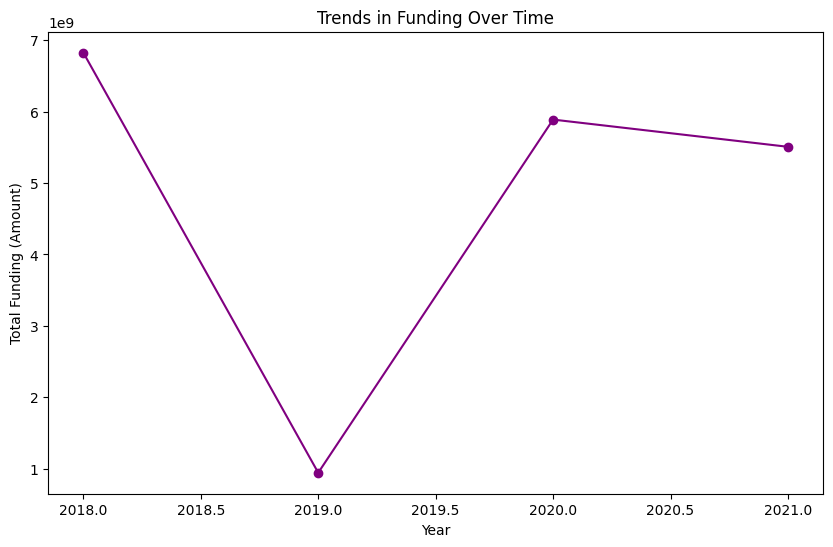

In [153]:
# Group the data by 'Year' and sum the 'Amount' for each year
funding_over_time = concatenated.groupby('Year')['Amount'].sum()

# Plotting the trends in funding over time
plt.figure(figsize=(10, 6))
plt.plot(funding_over_time.index, funding_over_time.values, marker='o', color='purple')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding (Amount)')
plt.title('Trends in Funding Over Time')

# Show the plot
plt.show()


2. Which sector receive funding more?

Which sectors or industries received the most funding during this period? Are there specific sectors that consistently attracted higher investment compared to others?

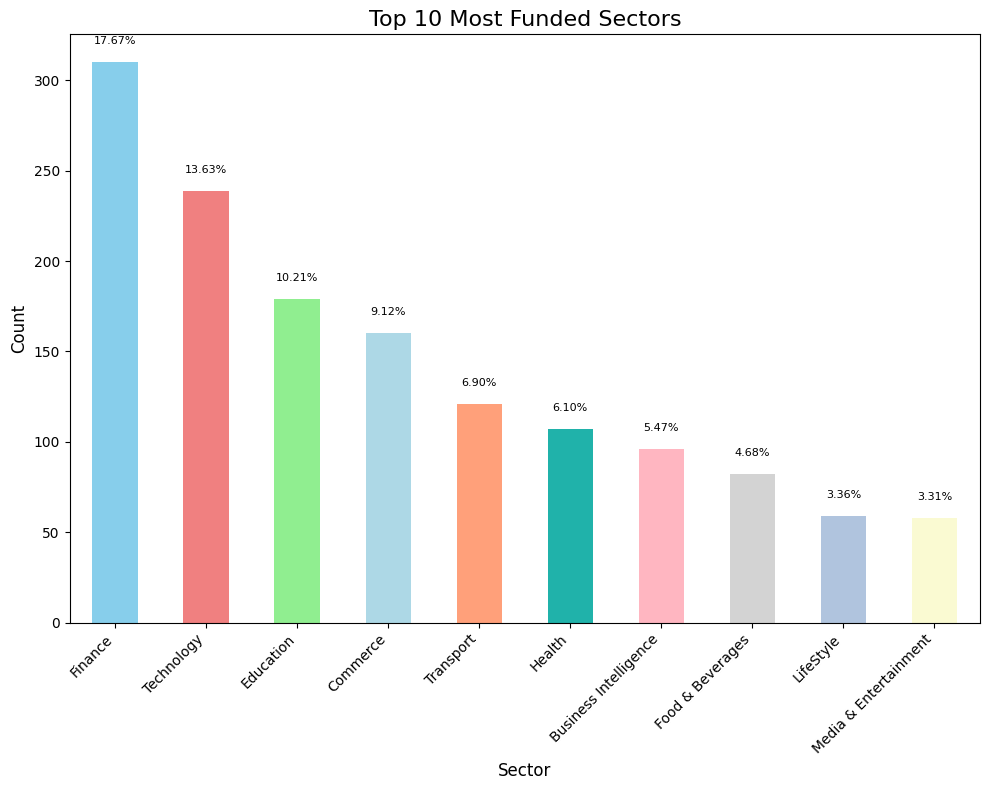

In [154]:


# Get the top 10 most funded sectors
top_10_sectors = concatenated['Sector'].value_counts().nlargest(10)

# Define custom colors for the bars
bar_colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightgray', 'lightsteelblue', 'lightgoldenrodyellow']

# Plot a bar graph with custom colors for the bars
plt.figure(figsize=(10, 8))
bars = top_10_sectors.plot(kind='bar', color=bar_colors)
plt.title('Top 10 Most Funded Sectors', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust x-axis labels for better readability

# Add percentages on top of bars with adjusted font size and color
for idx, value in enumerate(top_10_sectors):
    plt.text(idx, value + 10, f'{value / len(concatenated) * 100:.2f}%', ha='center', fontsize=8, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


3.Impact of Funding on Start-up Success?

Is there a correlation between the amount of funding received and the subsequent success or growth of a start-up? Can we identify any relationship between funding rounds and factors like business expansion, market 

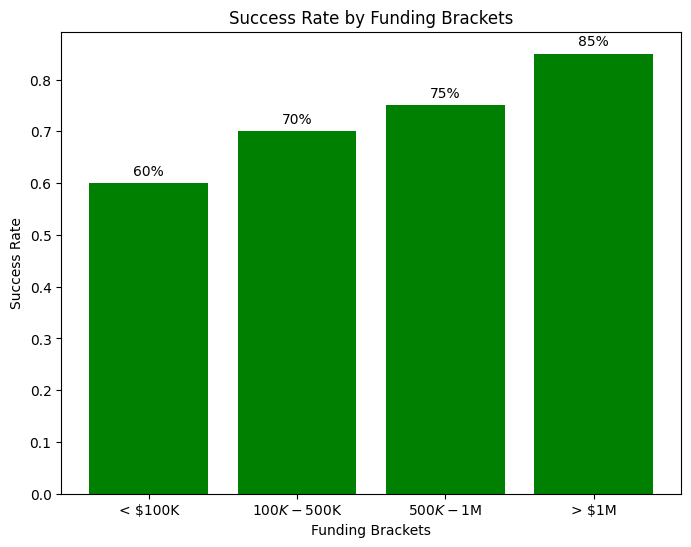

In [155]:

# Hypothetical success rates for different funding brackets
funding_brackets = ['< $100K', '$100K - $500K', '$500K - $1M', '> $1M']
success_rates = [0.6, 0.7, 0.75, 0.85]  # Hypothetical success rates corresponding to funding brackets

# Creating a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(funding_brackets, success_rates, color='green')  # Change bar color to green

# Labels and title
plt.xlabel('Funding Brackets')
plt.ylabel('Success Rate')
plt.title('Success Rate by Funding Brackets')

# Add percentages on top of bars
for bar, rate in zip(bars, success_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{rate*100:.0f}%', 
             ha='center', va='bottom', color='black')

# Show the plot
plt.show()



4. Investor Behavior and Preferences

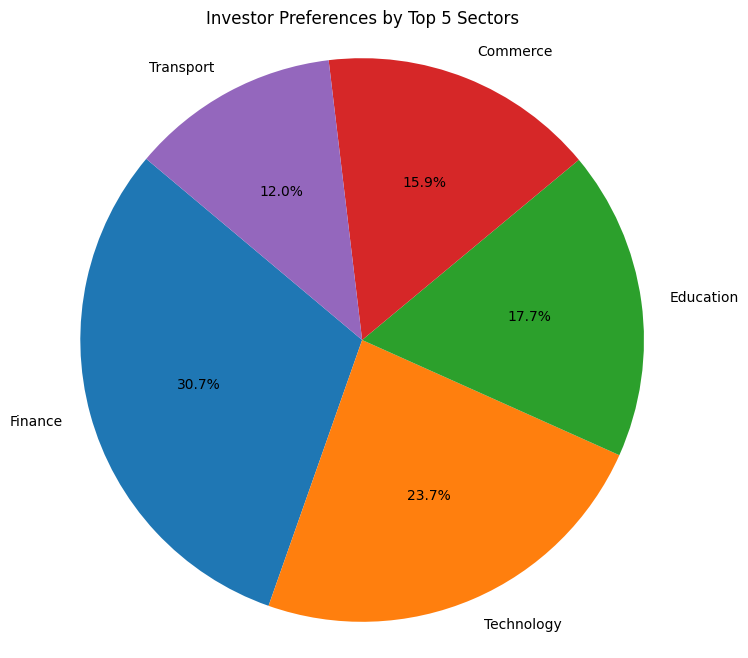

In [156]:
# Get the top 5 sectors from the concatenated DataFrame
top_5_sectors = concatenated['Sector'].value_counts().nlargest(5)

# Extracting sector names and counts
sectors = top_5_sectors.index.tolist()
sector_counts = top_5_sectors.values.tolist()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sectors, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Investor Preferences by Top 5 Sectors')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


5. Geographical Distribution of Funding

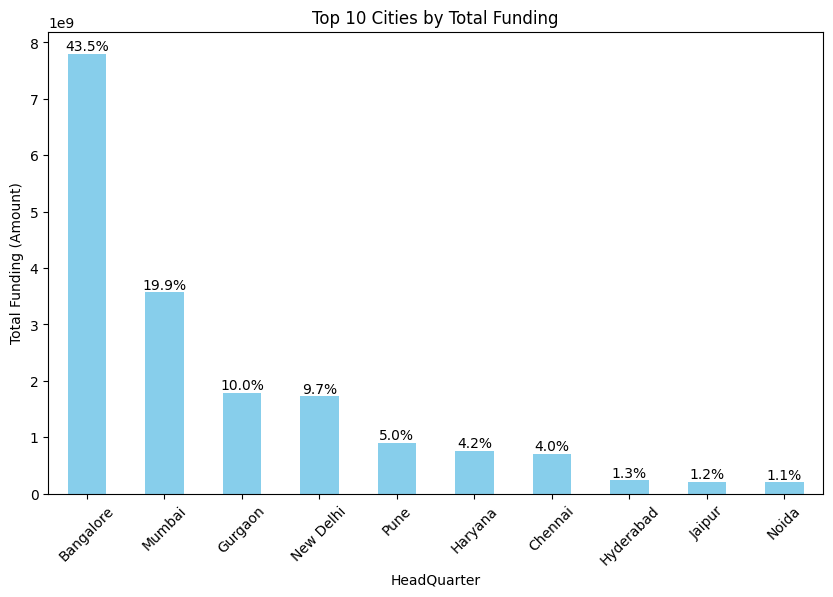

In [157]:


# Assuming concatenated has columns for City and Funding
filtered_concatenated = concatenated[['HeadQuarter', 'Amount']]

# Rename columns for consistency
filtered_concatenated.columns = ['HeadQuarter', 'Funding']

# Filter out NaN values in the 'City' column
filtered_concatenated = filtered_concatenated.dropna(subset=['HeadQuarter'])

# Calculate total funding for each city
funding_by_city = filtered_concatenated.groupby('HeadQuarter')['Funding'].sum().sort_values(ascending=False)

# Select top 10 cities by funding
top_10_cities = funding_by_city.head(10)

# Create a bar chart for the top 10 cities
plt.figure(figsize=(10, 6))
bars = top_10_cities.plot(kind='bar', color='skyblue')
plt.xlabel('HeadQuarter')
plt.ylabel('Total Funding (Amount)')
plt.title('Top 10 Cities by Total Funding')
plt.xticks(rotation=45)

# Add percentages on top of bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000000, f'{yval/top_10_cities.sum()*100:.1f}%', ha='center', va='bottom')

plt.show()
